# TOC
- [Throughput and Latency](#Throughput-and-Latency)
- [(Purdue) Throughput and Latency](#(Purdue)-Throughput-and-Latency)

# Throughput and Latency
---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graphs(title, ylabel, ylims, data, loc='upper right'):
    tests = ("Within Node", "Across Nodes", "External (via dtn)", "External (via spin)")

    width = 0.275  # the width of the bars
    x = np.arange(len(tests), dtype='float64') # the label locations\
    x[:1] += 0.5 * width
    x[1:] += 1. * width
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained')
    
    for method, measurement in data.items():
        offset = width * multiplier
        
        x_offset = (np.arange(len(measurement)) + offset )
        x_offset[1:] += 1.5 * width
        rects = ax.bar(x_offset, measurement, width, label=method)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width, tests)
    ax.legend(loc=loc, ncols=1)
    ax.set_ylim(*ylims)

    return



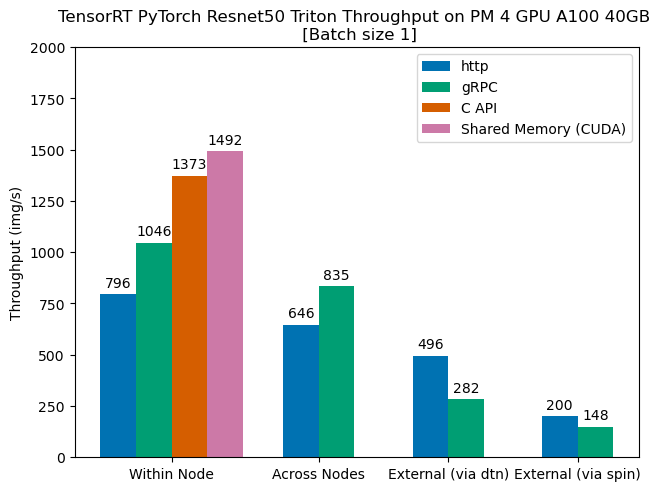

In [3]:
title = "TensorRT PyTorch Resnet50 Triton Throughput on PM 4 GPU A100 40GB \n [Batch size 1]"
ylabel = "Throughput (img/s)"
ylims = (0, 2000)
data = {
    'http': (796, 646, 496, 200),
    'gRPC': (1046, 835, 282, 148),
    'C API': (1373,),
    'Shared Memory (CUDA)': (1492,)
}

with plt.style.context('seaborn-v0_8-colorblind'):
    plot_graphs(
        title, ylabel, ylims, data
    )
    
    plt.show()

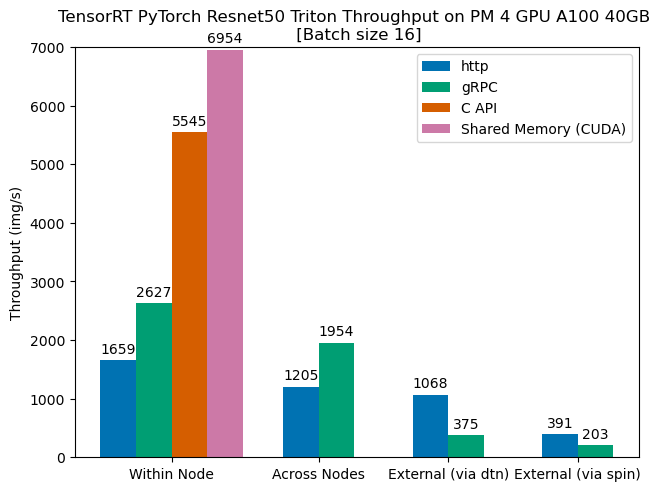

In [4]:
title = "TensorRT PyTorch Resnet50 Triton Throughput on PM 4 GPU A100 40GB \n [Batch size 16]"
ylabel = "Throughput (img/s)"
ylims = (0, 7000)
data = {
    'http': (1659, 1205, 1068, 391),
    'gRPC': (2627, 1954, 375, 203),
    'C API': (5545,),
    'Shared Memory (CUDA)': (6954,)
}

with plt.style.context('seaborn-v0_8-colorblind'):
    plot_graphs(
        title, ylabel, ylims, data
    )
    
    plt.show()

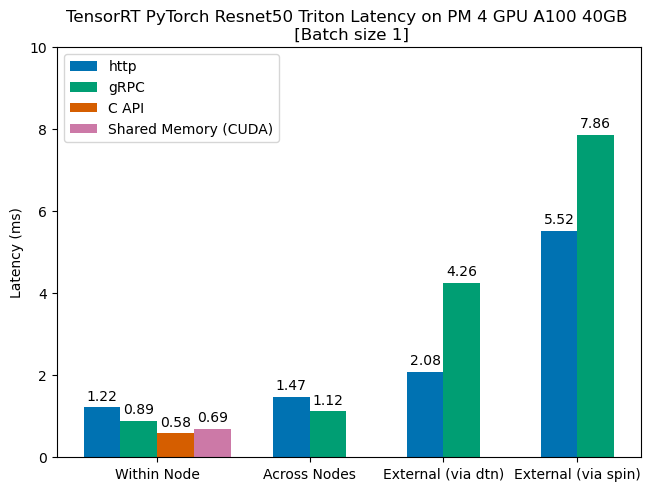

In [5]:
title = "TensorRT PyTorch Resnet50 Triton Latency on PM 4 GPU A100 40GB \n [Batch size 1]"
ylabel = "Latency (ms)"
ylims = (0, 10)
data = {
    'http': (1.22, 1.47, 2.08, 5.52),
    'gRPC': (0.89, 1.12, 4.26, 7.86),
    'C API': (0.58,),
    'Shared Memory (CUDA)': (0.69,)
}

with plt.style.context('seaborn-v0_8-colorblind'):
    plot_graphs(
        title, ylabel, ylims, data, 'upper left'
    )
    
    plt.show()

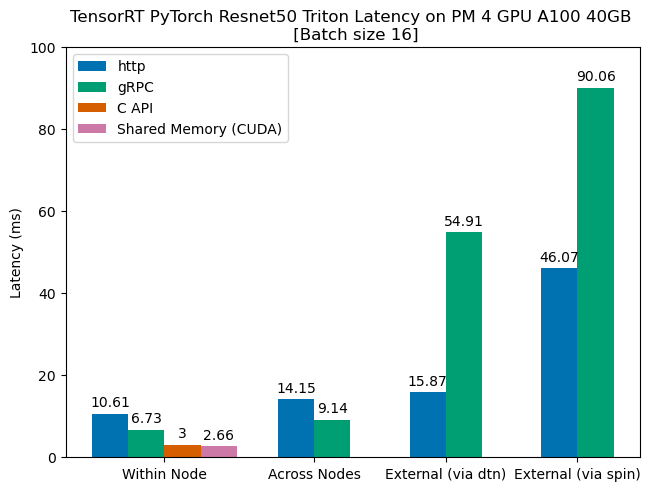

In [6]:
title = "TensorRT PyTorch Resnet50 Triton Latency on PM 4 GPU A100 40GB \n [Batch size 16]"
ylabel = "Latency (ms)"
ylims = (0, 100)
data = {
    'http': (10.61, 14.15, 15.87, 46.07),
    'gRPC': (6.73, 9.14, 54.91, 90.06),
    'C API': (3.00,),
    'Shared Memory (CUDA)': (2.66,)
}

with plt.style.context('seaborn-v0_8-colorblind'):
    plot_graphs(
        title, ylabel, ylims, data, 'upper left'
    )
    
    plt.show()

# (Purdue) Throughput and Latency
---

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graphs_v2(title, ylabel, ylims, data, loc='upper right'):
    tests = ("Intra\nNode", "Inter\nNode", "DTN", "Spin (k8s)", 
            "DTN", "Spin (k8s)")

    width = 0.3  # the width of the bars
    x = np.arange(len(tests), dtype='float64') # the label locations\
    multiplier = 0
    
    # fig, ax = plt.subplots()#layout='constrained')#, figsize=tuple(map(lambda x: x * 1.2, (6.4, 4.8))))
    fig, ax = plt.subplots(figsize=tuple(map(lambda x: x * 1.2, (6.4, 4.8))))
    
    for method, measurement in data.items():
        offset = width * multiplier
        
        x_offset = (np.arange(len(measurement)) + offset )
        rects = ax.bar(x_offset, measurement, width, label=method)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + 0.5 * width, tests)
    ax.legend(loc=loc, ncols=1)
    ax.set_ylim(*ylims)

    # Create a secondary x-axis
    secaxl = ax.secondary_xaxis(-0.125)
    secaxl.set_xticks([0.15-width, 3.15+width])
    secaxl.set_xticklabels([])
    secaxl.tick_params(direction='in',length=6)
    secaxl.spines.bottom.set_bounds(0.15-width, 3.15+width)

    secax = ax.secondary_xaxis(-0.125)
    secax.set_xticks([1.65])
    secax.set_xticklabels(["NERSC"])
    secax.spines.bottom.set_bounds(0.15-width, 3.15+width)
    
    # #create 2nd secondary x-axis
    se2cax = ax.secondary_xaxis(-0.125)
    se2cax.set_xticks([4.65])
    se2cax.set_xticklabels(["Purdue [50ms]"])
    se2cax.spines.bottom.set_bounds(4.15-width, 5.15+width)

    se2caxl = ax.secondary_xaxis(-0.125)
    se2caxl.set_xticks([4.15-width, 5.15+width])
    se2caxl.set_xticklabels([])
    se2caxl.tick_params(direction='in',length=6)
    se2caxl.spines.bottom.set_bounds(4.15-width, 5.15+width)

    return fig, ax



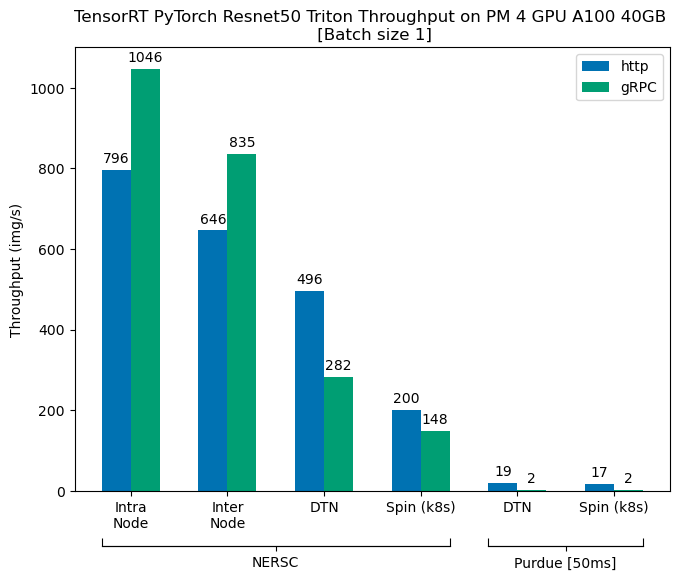

In [8]:
title = "TensorRT PyTorch Resnet50 Triton Throughput on PM 4 GPU A100 40GB \n [Batch size 1]"
ylabel = "Throughput (img/s)"
ylims = (0, 1100)
data = {
    'http': (796, 646, 496, 200, 19, 17),
    'gRPC': (1046, 835, 282, 148, 2, 2),
}

with plt.style.context('seaborn-v0_8-colorblind'):
    plot_graphs_v2(
        title, ylabel, ylims, data
    )
    
    plt.show()

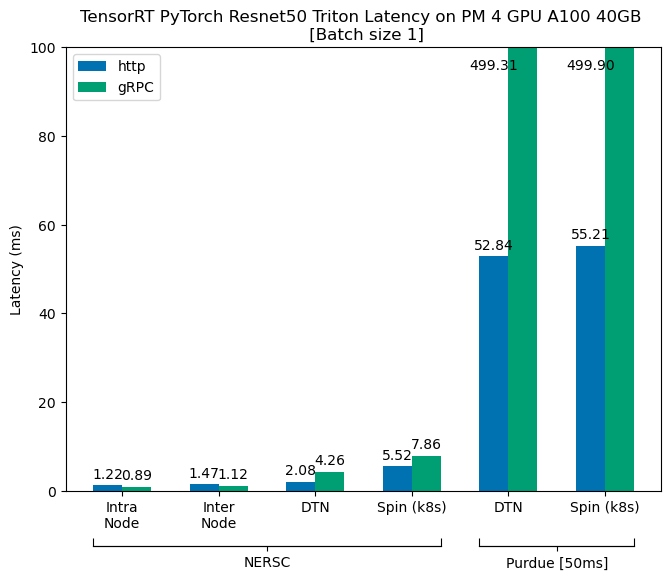

In [9]:
title = "TensorRT PyTorch Resnet50 Triton Latency on PM 4 GPU A100 40GB \n [Batch size 1]"
ylabel = "Latency (ms)"
ylims = (0, 100)
data = {
    'http': (1.22, 1.47, 2.08, 5.52, 52.84, 55.21),
    'gRPC': (0.89, 1.12, 4.26, 7.86, 499.31, 499.90),
}

with plt.style.context('seaborn-v0_8-colorblind'):
    fig, ax = plot_graphs_v2(
        title, ylabel, ylims, data, 'upper left'
    )
    ax.text(5.15-0.3-0.1, 95, "499.90")
    ax.text(4.15-0.3-0.1, 95, "499.31")
    
    plt.show()